# Lecture 13: July 24th, 2023

__Today:__
* Finish up Newton's method material.
* Go over instructions for final homework assignment.
* Start image processing!

***

## Newton's Method

Let's copy over some of the code we wrote last time.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-darkgrid')

In [4]:
f = lambda x: x**3-2*x+2
df = lambda x: 3*x**2 - 2
newt = lambda z: z - f(z)/df(z)

In [5]:
z = -1.5
reps = 3
arr = np.zeros(reps+1)
arr[0] = z #set the starting value to z

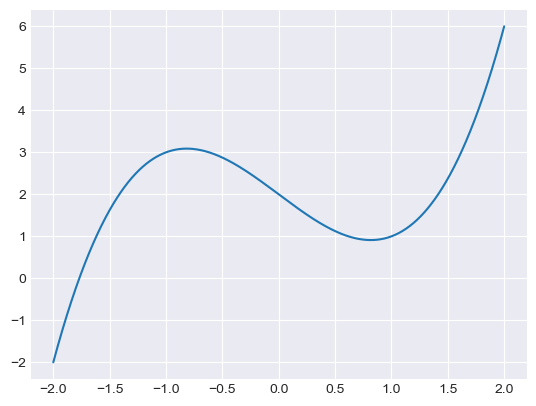

In [7]:
fig, ax = plt.subplots()
x = np.linspace(-2,2,1000)
ax.plot(x,f(x));

### Applying at a worse point

Let $f(x) = x^3 - 2x + 2$. Starting at $x_0 = -0.5$, apply Newton's method three times to estimate a root of $f$.

In [103]:
z = -0.5
reps = 3
arr = np.zeros(reps+1)
arr[0] = z #set the starting value to z

In [104]:
for i in range(reps):
    arr[i+1] = newt(arr[i])

In [105]:
arr

array([-0.5       ,  1.8       ,  1.25181347,  0.71203147])

In [106]:
newt(1.8)

1.2518134715025906

__Recall:__ The last element of `arr` represents our estimated root. Notice that the 0.936 we get here is much farther from 0 than the -0.0001 we got from applying Newton's method three times to the `z_0 = -1.5`.

In [107]:
f(arr)

array([2.875     , 4.232     , 1.45801104, 0.93692905])

Question asked in the chat: if we increase the number of reps will the estimate get better? We tried updating `reps` to 10, and saw that the estimate, in fact, got much worse!

The next thing I want to do is add tangent lines to the graph to help understand what's going on. 

Note for those reading after lecture: the helper function `tang` is defined below.

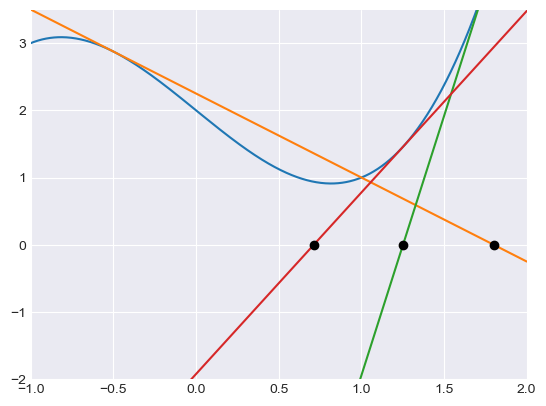

In [109]:
fig, ax = plt.subplots()
x = np.linspace(-2,2,1000)
ax.plot(x,f(x));
for i in range(reps):
    ax.plot(x,tang(arr[i])(x))
    ax.plot(arr[i+1],0,'ko')
ax.set(xlim=(-1,2),ylim=(-2,3.5));

In [31]:
arr

array([-0.5       ,  1.8       ,  1.25181347,  0.71203147])

In [27]:
#helper function for plotting tangent lines
#returns a function for plotting
# y - f(x0) = f'(x0)(x-x0)
def tang(x0):
    return lambda x: df(x0)*(x-x0) + f(x0)

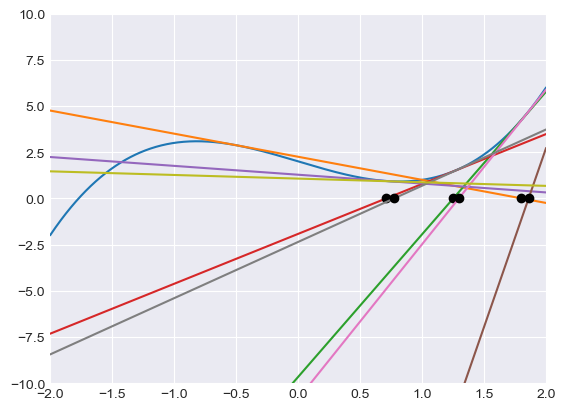

In [37]:
reps = 10
arr = np.zeros(reps+1)
arr[0] = z
fig, ax = plt.subplots()
x = np.linspace(-2,2,1000)
ax.plot(x,f(x));
for i in range(reps):
    ax.plot(x,tang(arr[i])(x));
    arr[i+1] = newt(arr[i])
    ax.plot(arr[i+1],0,'ko');
ax.set(xlim=(-2,2),ylim=(-10,10));

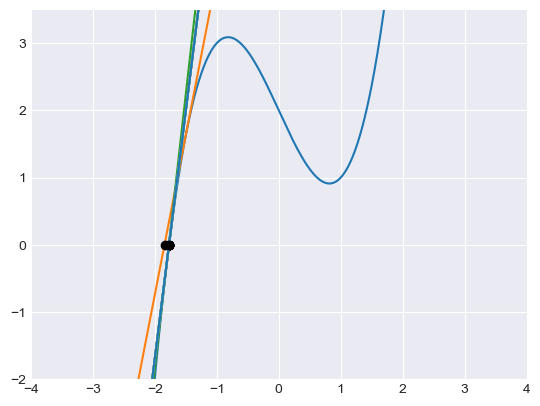

In [40]:
#Here is an example with a good starting point
z = -1.5
reps = 10
arr = np.zeros(reps+1)
arr[0] = z
fig, ax = plt.subplots()
x = np.linspace(-4,4,1000)
ax.plot(x,f(x));
for i in range(reps):
    ax.plot(x,tang(arr[i])(x));
    arr[i+1] = newt(arr[i])
    ax.plot(arr[i+1],0,'ko');
ax.set(xlim=(-4,4),ylim=(-2,3.5));

Below is the same strange behavior we saw in Desmos last time. We will forever alternate between $x = 0$ and $x = 1$.

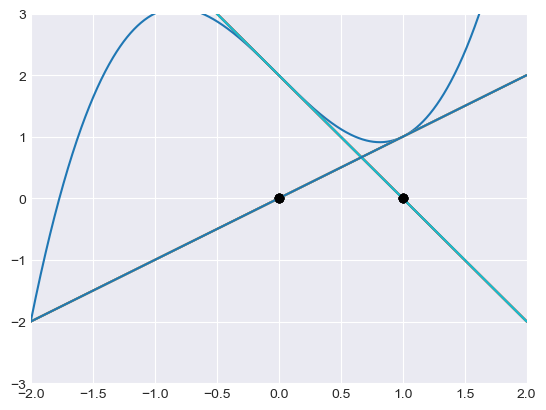

In [41]:
z = 0
reps = 10
arr = np.zeros(reps+1)
arr[0] = z
fig, ax = plt.subplots()
x = np.linspace(-2,2,1000)
ax.plot(x,f(x));
for i in range(reps):
    ax.plot(x,tang(arr[i])(x));
    arr[i+1] = newt(arr[i])
    ax.plot(arr[i+1],0,'ko');
ax.set(xlim=(-2,2),ylim=(-3,3));

In [42]:
arr

array([0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.])

### Analyzing Newton's method

Let $f(x) = x^3 - 2x + 2$. For each value of $z$ in `np.linspace(-2,2,100)`, apply Newton's method 7 times and call the result $z_7$. For how many of these 100 values do we have $-0.001 < f(z_7) < 0.001$?

In [111]:
z = np.linspace(-2,2,100)

Recall: In the previous two examples we defined a 1D NumPy array to hold the results of Newton's method. Here, we will use a 2D NumPy array where each row represents 7 iterations of Newton's method at a starting point in `z`.

In [112]:
#We could put 100 instead of len(z), but len(z) is slightly more robust
reps = 7
arr = np.zeros((len(z),reps+1))

In [113]:
#Let's set the first column of arr to be our starting values
arr[:,0] = z

In [48]:
arr

array([[-2.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-1.95959596,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-1.91919192,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-1.87878788,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-1.83838384,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-1.7979798 ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-1.75757576,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-1.71717172,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-1.67676768,  0.        

In [49]:
for i in range(reps):
    arr[:,i+1] = newt(arr[:,i])

In [50]:
#last column of arr
results = arr[:,-1]

Now, I need to figure out which results are "good", and which results are "bad"...

In [60]:
# Returns boolean array where True everywhere f(results) is small,
# and False everywhere else.
good_bool = np.abs(f(results)) < 0.001

In [67]:
bad_bool = ~good_bool

In [68]:
bad_bool.sum()

68

In [61]:
good_bool.sum()

32

In [63]:
np.count_nonzero(good_bool)

32

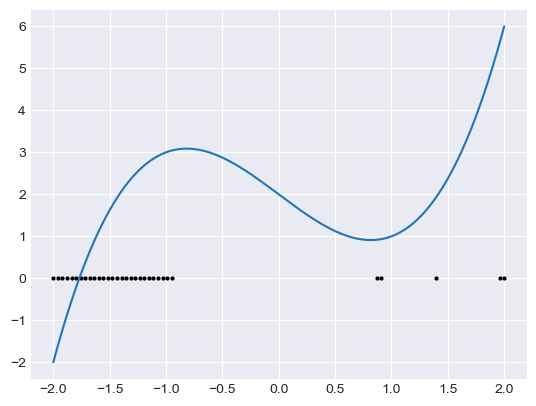

In [65]:
fig, ax = plt.subplots()
x = np.linspace(-2,2,1000)
pts = z[good_bool]
ax.plot(pts,np.zeros(len(pts)),'ko',markersize=2)
ax.plot(x,f(x));

How do we interpret this image? The black points represent starting values that will yield a good estimate of a root of `f` after 7 iterations of Newton's method. 

The strange part is how some far away guess points actually give a pretty good estimate in the end.

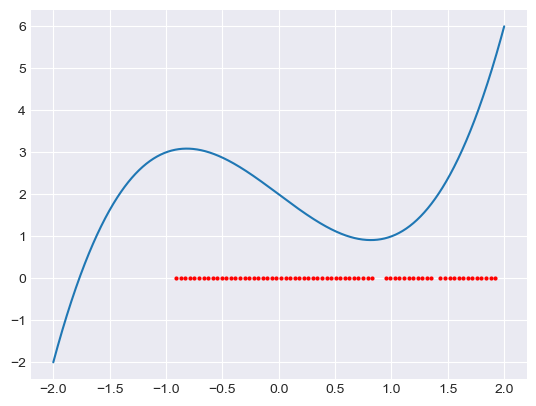

In [59]:
fig, ax = plt.subplots()
x = np.linspace(-2,2,1000)
pts = z[~good_bool]
ax.plot(pts,np.zeros(len(pts)),'ro',markersize=2)
ax.plot(x,f(x));

***

## Pillow Image Processing

In [69]:
from PIL import Image

PIL stands for Python Imaging Library. In the past, it was used for all kinds of image processing in Python. When it got retired, the Pillow project forked it and now maintains it.

### Opening an Image

In [71]:
import os

The easiest way to open an image is to have it in the same folder as the notebook you're working in.

This is how we can find out the folder this notebook is in.

In [72]:
os.getcwd()

'/Users/yasmeen/Dropbox/UCI/IoR/Summer Session 2023/SS1 Math 9/Jupyterbook/Math9-SSI23/lectures'

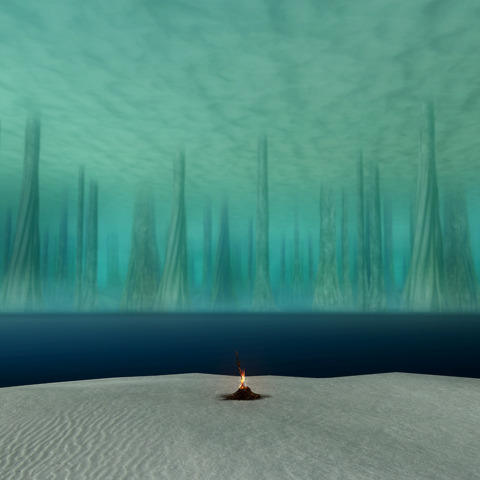

In [73]:
Image.open("ash-lake.jpg")

Typically, we create a separate folder within the folder we're working in to store all the images we'll be working with. For me, I usually call this folder `images`.

The code below lists all files in the `images` folder.

In [74]:
os.listdir("images")

['artorias.jpg', 'anor-londo.jpg']

If I do the following, it lists all files/directories/etc. in the cwd.

In [75]:
os.listdir()

['lec8.ipynb',
 '.DS_Store',
 'lec10.ipynb',
 'lec12.ipynb',
 'images',
 'Teaching-25.jpg',
 'Teaching-31.jpg',
 'Teaching-19.jpg',
 'Teaching-18.jpg',
 'Teaching-30.jpg',
 'Teaching-24.jpg',
 'lec9.ipynb',
 'Teaching-32.jpg',
 'Teaching-26.jpg',
 'Teaching-27.jpg',
 'Teaching-23.jpg',
 'Teaching-22.jpg',
 'lec13.ipynb',
 'lec11.ipynb',
 'Teaching-20.jpg',
 'Teaching-21.jpg',
 'ash-lake.jpg',
 'Teaching-17.jpg',
 'Teaching-29.jpg',
 'Teaching-28.jpg',
 '.ipynb_checkpoints']

What if I wanted to open the `anor-londo.jpg` file that I see is in `images`? The following will throw an error...

In [76]:
Image.open("anor-londo.jpg")

FileNotFoundError: [Errno 2] No such file or directory: 'anor-londo.jpg'

What's happening is that I need a way of saying "go to the images folder" first.

Depending on your operating system, file paths are written a little bit differently. Here's how we can get the path to the image I want that will work regardless of what system you're on.

In [79]:
os.path.join("images","anor-londo.jpg")

'images/anor-londo.jpg'

In [80]:
s = os.path.join("images","anor-londo.jpg")

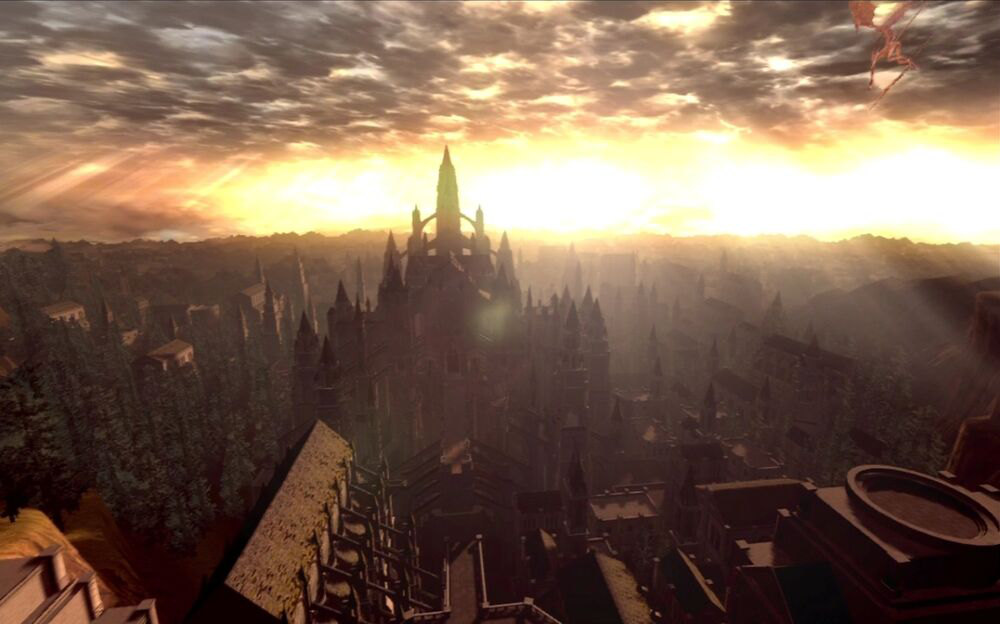

In [82]:
Image.open(s)

What if I wanted to see all the `jpg` files in a folder?

In [83]:
[x for x in os.listdir("images") if x[-3:] == "jpg"]

['artorias.jpg', 'anor-londo.jpg']

Below is the slightly more pythonic way, since we're not counting how many characters we need.

In [84]:
[x for x in os.listdir("images") if x.endswith("jpg")]

['artorias.jpg', 'anor-londo.jpg']

If we wanted to look for `png` and `jpg` at the same time (notice I don't have any pngs in my folder, right now):

In [87]:
[x for x in os.listdir("images") if (x.endswith("png") or x.endswith("jpg"))]

['artorias.jpg', 'anor-londo.jpg']

### NumPy Arrays and Images

In [88]:
from PIL import Image
import numpy as np

In [89]:
img = Image.open("ash-lake.jpg")

In [90]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

So far, our image has nothing to do with a NumPy array. Here's how we actually get the array:

In [92]:
arr = np.asarray(img)
type(arr)

numpy.ndarray

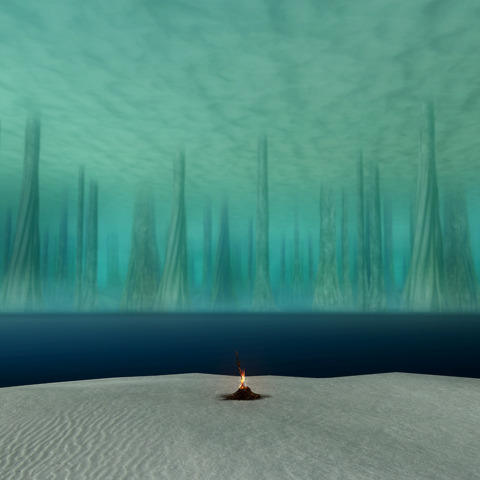

In [93]:
img

In [94]:
arr.shape

(480, 480, 3)

Notice! This is a 3D NumPy array. The 480 by 480 portion means I have 480 rows and 480 columns. The 3 represents RGB (Red-Green-Blue) channels. 

In [95]:
#RGB values of the top-left corner
arr[0,0]

array([ 83, 161, 148], dtype=uint8)

Notice the dominant colors are green and blue.

You might be wondering what ranges are valid for RGB. Let's do a little experiment.

In [96]:
arr.max()

255

In [97]:
arr.min()

0

RGB values are integers between 0 and 255. This is a total of 256 possible values. Notice $256 = 2^8$. This is why we will represent RGB values as (unsigned) 8-bit integers.

Like I mentioned, images give us a great way of visualizing NumPy arrays. Here's an example:

In [99]:
arr[:,300:].shape

(480, 180, 3)

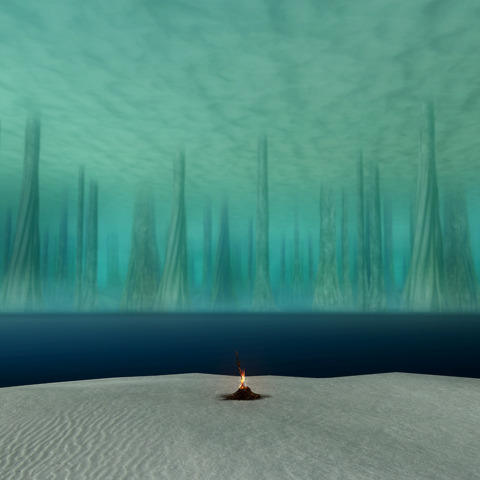

In [100]:
img

Here's how we can go from NumPy array to an image...

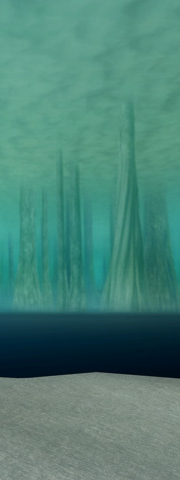

In [101]:
Image.fromarray(arr[:,300:])